### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Preparing the data
#### 3. Time series analysis: decomposition
#### 4. Dickey-Fuller test for stationarity
#### 5. Differencing

## 1.0 Importing libraties and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [2]:
# ensure that charts are displayed without having to call them
%matplotlib inline

In [3]:
# create path
path = r"C:\Users\Asus 17\OneDrive\Desktop\Achievement 6\amsterdam"

In [4]:
# open calendar
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'calendar_wrangled.csv'))

In [5]:
#check it out
df.shape

(7310950, 5)

In [6]:
df.head()

,Unnamed: 0,listing_id,date,available,price
0,0,2818,2019-12-05,f,NaN
1,1,73208,2019-08-30,f,NaN
2,2,73208,2019-08-29,f,NaN
3,3,73208,2019-08-28,f,NaN
4,4,73208,2019-08-27,f,NaN


## 2.0 Preparing Data

In [7]:
df= df.drop(columns = ('Unnamed: 0'))

In [8]:
df.head()

,listing_id,date,available,price
0,2818,2019-12-05,f,NaN
1,73208,2019-08-30,f,NaN
2,73208,2019-08-29,f,NaN
3,73208,2019-08-28,f,NaN
4,73208,2019-08-27,f,NaN


In [9]:
# convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

In [10]:
#filter available listings
available_listings = df[df['available'] == 't']

In [11]:
# group by date and count the available listings
sum_available = available_listings.groupby('date').size().reset_index(name = 'available')

In [12]:
#set the date as the index
sum_available = sum_available.set_index('date')

In [13]:
sum_available.columns

Index(['available'], dtype='object')

In [14]:
sum_available.head()

,available
date,
2018-12-06,1188
2018-12-07,1424
2018-12-08,1723
2018-12-09,2875
2018-12-10,3311


In [15]:
sum_available.shape

(366, 1)

In [16]:
# rename as data for ease of the exercise
data = sum_available

In [17]:
data.shape

(366, 1)

In [18]:
type(data)

pandas.core.frame.DataFrame

In [19]:
data.describe()

,available
count,366.000000
mean,3278.882514
std,629.344569
min,265.000000
25%,2919.500000
50%,3078.500000
75%,3423.750000
max,4823.000000


#### This should give us an interesting picture of how many properties are available at different times of the year. Several factors are out of control here. Perhaps the next few months contain more accurate data than those nearly a whole year away. Properties may be delisted or new properties may be listed in this time. But we will at least be able to look for patterns and maybe ask some more questions.

## 3. Time Series Analysis - decomposition

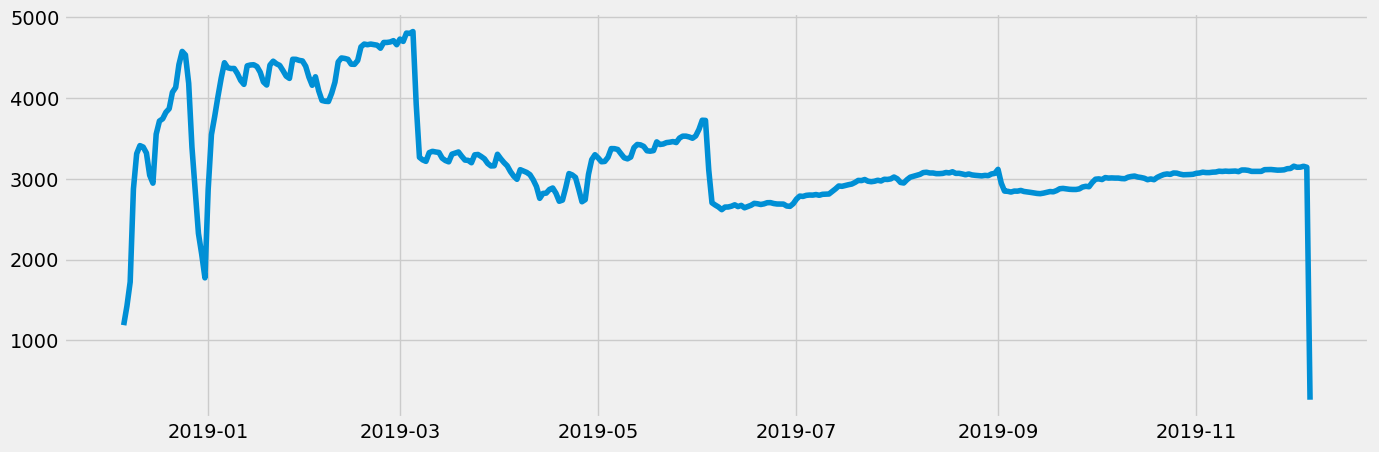

In [20]:
#plot the data using matplotlib
plt.figure(figsize = (15, 5), dpi = 100 )
plt.plot(data)

In [21]:
# Decompose the data using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

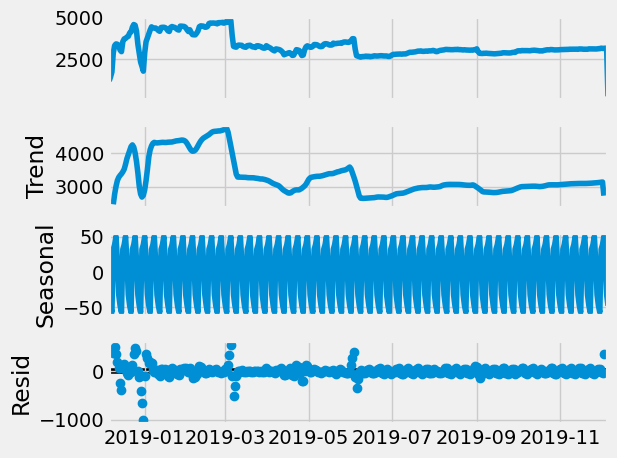

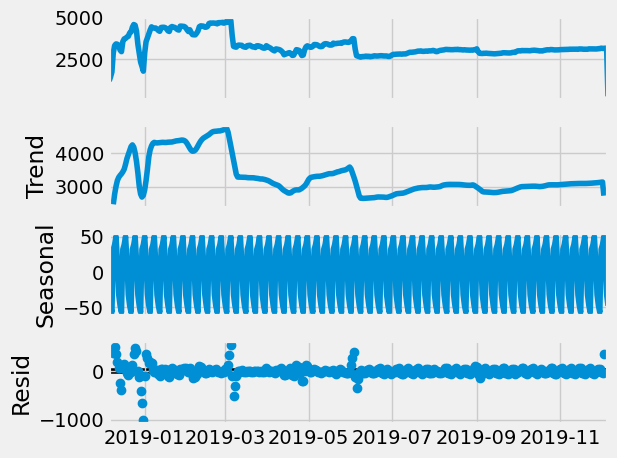

In [22]:
# Plot the separate components

decomposition.plot()

#### Analysis
I would suggest that the seasonal element is representative of the fact that more properties are made available for short term rental on the weekends than during the week. 
<br>  

Perhaps there are local events in Amsterdam which coincide with the presence of extra noise at those distinct points. Obviously one could be related to New Years Eve. I will have to look into what the others could be. 
<br>  

Its interesting that there are fewer properties available over the summer months. If it weren't for the gentle trend up towards the end of the year, I would assume that maybe hosts update their availability for the coming 3 months and leave their properties listed as unavailable until the time comes closer.

## 4. Dickey-Fuller test for stationarity

In [23]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

In [24]:
# Define the function
def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity Test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index = ['Test Statistic', 'p-value', 'Number of Lags Used', 'Number of Observations Used'])#
    for key, value in test[4].items():
        result['Critical Value (%s)' % key] = value
    print (result)

In [25]:
# apply the test to data
dickey_fuller(data['available'])

Dickey-Fuller Stationarity Test:
Test Statistic                  -1.150283
p-value                          0.694609
Number of Lags Used              8.000000
Number of Observations Used    357.000000
Critical Value (1%)             -3.448801
Critical Value (5%)             -2.869670
Critical Value (10%)            -2.571101
dtype: float64


As the Test Statistic (-1.150283) is greater than any of the critical values, I can't reject the Null Hypothesis That there IS a unit root in my data. Therefore my data isn't stationary and further treatment will be required. 

## 5. Differencing

In [26]:
# making the whole thing t - (t -1)
data_diff = data - data.shift(1) 

In [27]:
#take a look
data_diff.head()

,available
date,
2018-12-06,NaN
2018-12-07,236.0
2018-12-08,299.0
2018-12-09,1152.0
2018-12-10,436.0


In [28]:
data_diff.columns

Index(['available'], dtype='object')

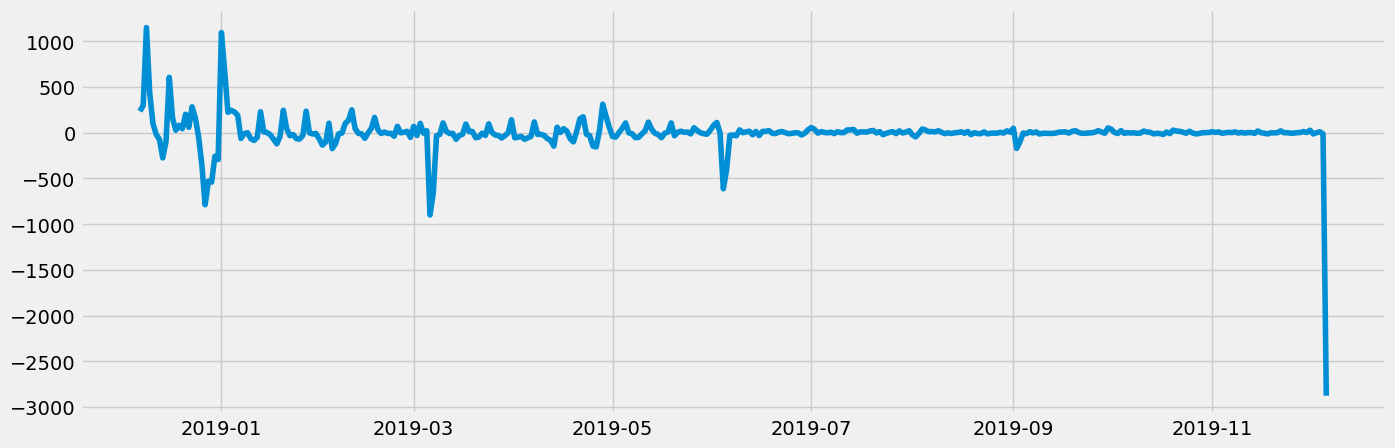

In [29]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

 Wow. I guess if I shave a day or two off the end, this will be very close

In [30]:
data_diff.tail(15)

,available
date,
2019-11-22,21.0
2019-11-23,1.0
2019-11-24,1.0
2019-11-25,-4.0
2019-11-26,-4.0
2019-11-27,1.0
2019-11-28,3.0
2019-11-29,14.0
2019-11-30,3.0


In [31]:
data.tail(15)

,available
date,
2019-11-22,3113
2019-11-23,3114
2019-11-24,3115
2019-11-25,3111
2019-11-26,3107
2019-11-27,3108
2019-11-28,3111
2019-11-29,3125
2019-11-30,3128


In [32]:
#create a new dataset to play with
data_2 = data.reset_index()

In [33]:
data_sub = data_2.loc[data_2['date'] < '2019-12-06']

In [34]:
data_sub.tail()

,date,available
360,2019-12-01,3156
361,2019-12-02,3143
362,2019-12-03,3144
363,2019-12-04,3155
364,2019-12-05,3143


In [35]:
#create a datetime column from date
data_sub['datetime'] = pd.to_datetime(data_sub['date'])
#set it as the index
data_sub = data_sub.set_index('datetime')
#drop the 'date' column
data_sub.drop(['date'], axis = 1, inplace = True)

In [36]:
data_sub.head()

,available
datetime,
2018-12-06,1188
2018-12-07,1424
2018-12-08,1723
2018-12-09,2875
2018-12-10,3311


In [37]:
data_sub.tail()

,available
datetime,
2019-12-01,3156
2019-12-02,3143
2019-12-03,3144
2019-12-04,3155
2019-12-05,3143


In [38]:
# apply the test to data_sub
dickey_fuller(data_sub['available'])

Dickey-Fuller Stationarity Test:
Test Statistic                  -1.593370
p-value                          0.486923
Number of Lags Used             17.000000
Number of Observations Used    347.000000
Critical Value (1%)             -3.449337
Critical Value (5%)             -2.869906
Critical Value (10%)            -2.571227
dtype: float64


In [39]:
# making the whole thing t - (t -1)
data_diff = data_sub - data_sub.shift(1) 

In [40]:
#take a look
data_diff.head()

,available
datetime,
2018-12-06,NaN
2018-12-07,236.0
2018-12-08,299.0
2018-12-09,1152.0
2018-12-10,436.0


In [41]:
data_diff.columns

Index(['available'], dtype='object')

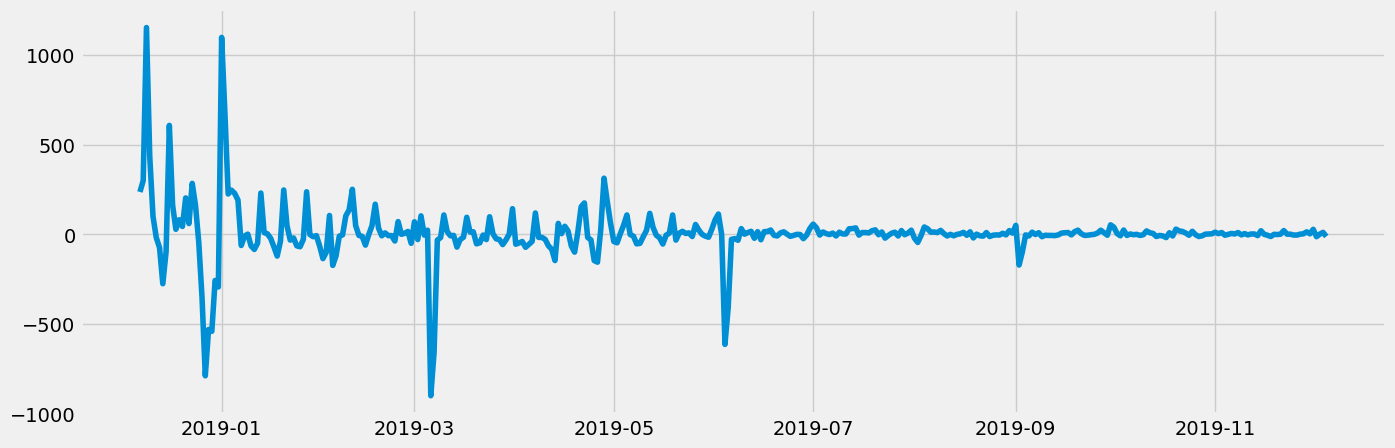

In [42]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

Badabing. I guess that has it. 

In [43]:
# apply the test to data_diff
dickey_fuller(data_diff['available'])

Dickey-Fuller Stationarity Test:


MissingDataError: exog contains inf or nans

In [ ]:
#check out that nan
data_diff.isnull().sum()

In [ ]:
#replace that first one with the mean
data_diff = data_diff.fillna(data_diff.mean())

In [ ]:
# apply the test to data_diff
dickey_fuller(data_diff['available'])

There we go. The test statistic is much lower than than our critical values. So we can reject the null hypothesis that a unit root is present. This result is significant as our p-value is much smaller than 0.05.

In [ ]:
# Check for autocorrelations
#import the autocorrelation and partial correlation plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf #import the autocorrelation and partial correlation plots
plot_acf(data_diff)


I count 8 points which are outside the blue area. Less than 10, so we're set to move on. 

In [46]:
data_out = data_diff.reset_index()

In [47]:
#export data_out
data_out.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'calendar_diff.csv'))